In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("/kaggle/input/global-best-selling-phone-sales/top 120 best-selling mobile phones.csv")
df.columns

Index(['Rank', 'Manufacturer', 'Model', 'Form Factor', 'Smartphone?', 'Year',
       'Units Sold (million )'],
      dtype='object')

In [124]:
df.columns = df.columns.str.lower()
df.rename(columns={'smartphone?' : "is_smartphone", 'units sold (million )' : 'units_sold', 'form factor' : 'form_factor'}, inplace=True)
df.columns

Index(['rank', 'manufacturer', 'model', 'form_factor', 'is_smartphone', 'year',
       'units_sold'],
      dtype='object')

In [146]:
# df = df.drop(columns=['form_factor'])
df['units_sold'] = df['units_sold'].astype(int)
df.describe(include='all')

KeyError: 'unit_sold_million'

In [126]:
# df = df.drop(columns=['form factor'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           120 non-null    int64  
 1   manufacturer   120 non-null    object 
 2   model          120 non-null    object 
 3   form_factor    120 non-null    object 
 4   is_smartphone  120 non-null    bool   
 5   year           120 non-null    int64  
 6   units_sold     120 non-null    float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 5.9+ KB


In [127]:
df.isnull().sum()

rank             0
manufacturer     0
model            0
form_factor      0
is_smartphone    0
year             0
units_sold       0
dtype: int64

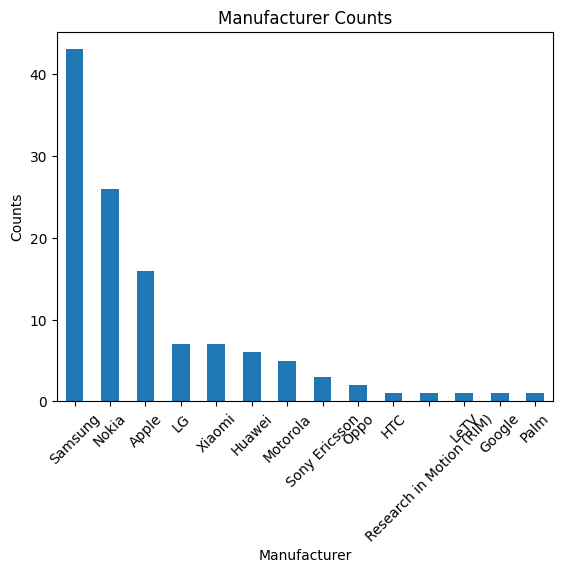

In [141]:
df.manufacturer.value_counts().plot(kind="bar")
plt.xticks(rotation = 45)
plt.title("Manufacturer Counts")
plt.xlabel('Manufacturer')
plt.ylabel('Counts')

plt.show()

In [128]:
df.duplicated().sum()

0

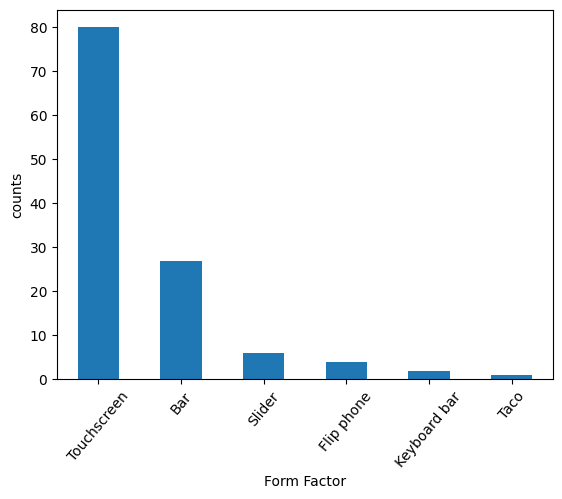

In [142]:
df.form_factor.value_counts().plot(kind='bar')
plt.xticks(rotation=50)
plt.xlabel("Form Factor")
plt.ylabel("counts")
plt.show()

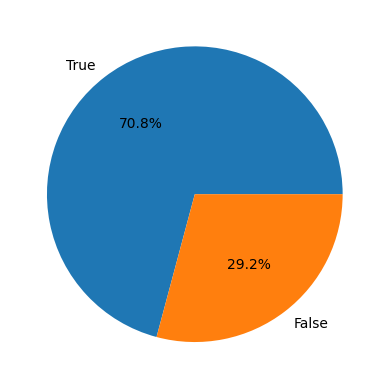

In [144]:
df['is_smartphone'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.ylabel('')
plt.show()

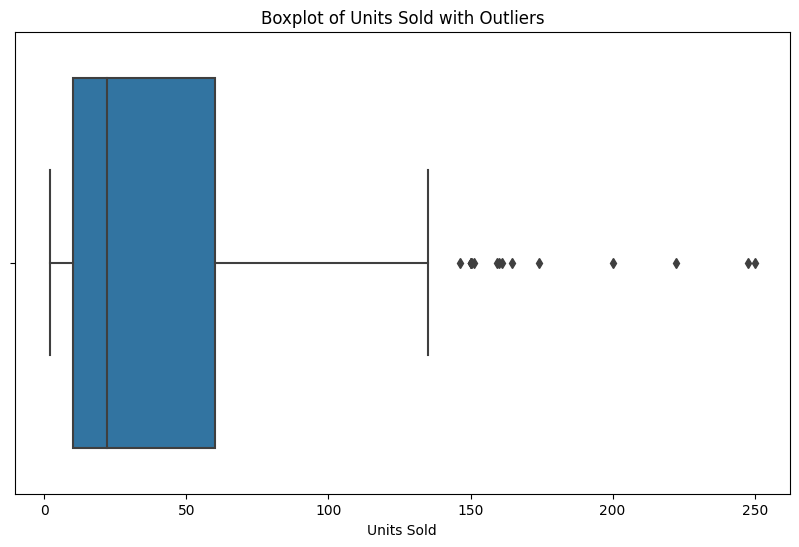

In [129]:
# 'Rank', 'Manufacturer', 'Model', 'Form Factor', 'Smartphone?', 'Year', 'Units Sold (million )'

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
columns_to_plot = ['Units Sold (million )']
sns.boxplot(x=df['units_sold'])
plt.title('Boxplot of Units Sold with Outliers')
plt.xlabel('Units Sold')
plt.show()

In [130]:
# outlier = 190
# df = df[df['units_sold'] <= outlier]

# plt.figure(figsize=(10, 6))
# sns.boxplot(x='units_sold', data=df)
# plt.title('Boxplot of Units Sold After Removing Outliers')
# plt.xlabel('Units Sold')
# plt.show()

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           120 non-null    int64  
 1   manufacturer   120 non-null    object 
 2   model          120 non-null    object 
 3   form_factor    120 non-null    object 
 4   is_smartphone  120 non-null    bool   
 5   year           120 non-null    int64  
 6   units_sold     120 non-null    float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 5.9+ KB


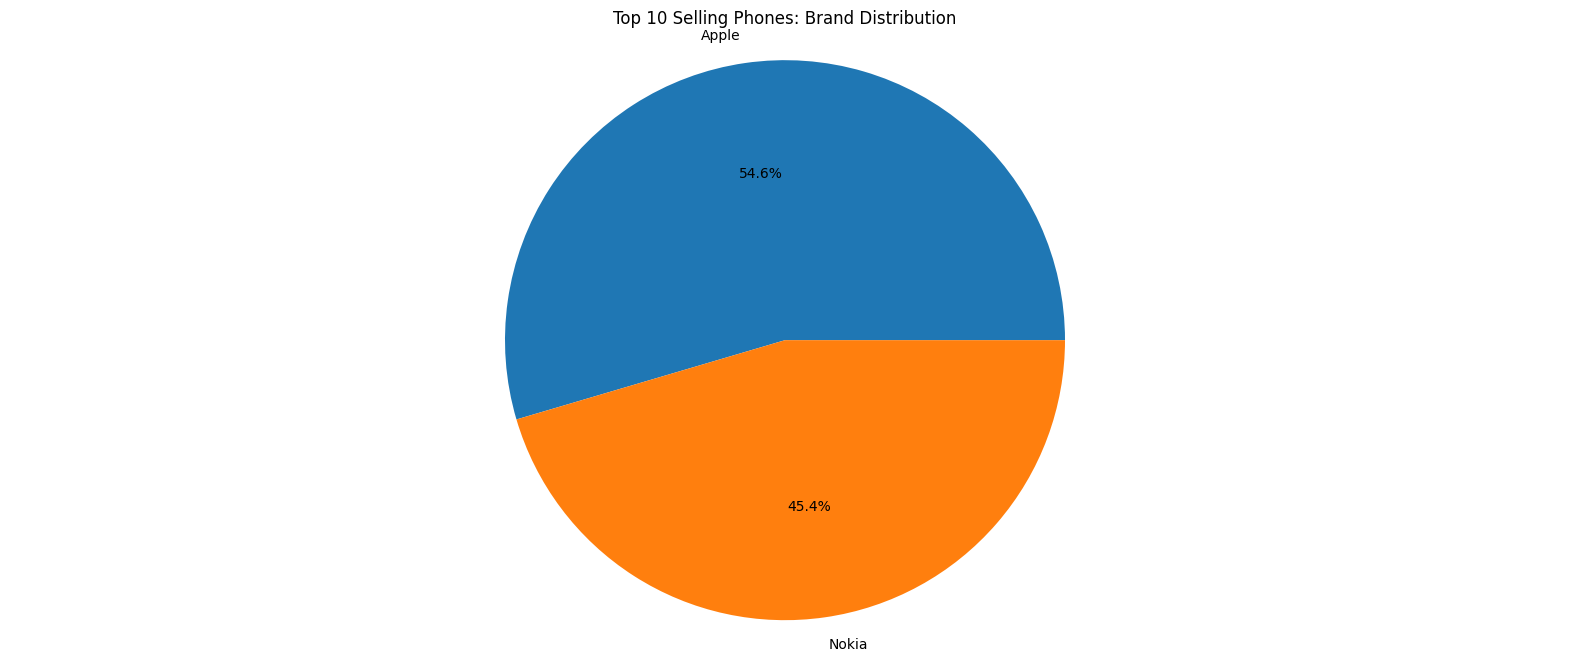

In [132]:
top_10_phones = df.sort_values(by='units_sold', ascending=False).head(10)
brand_counts = top_10_phones.groupby('manufacturer')['units_sold'].sum()

plt.figure(figsize=(20, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Selling Phones: Brand Distribution')
plt.axis('equal')
plt.show()

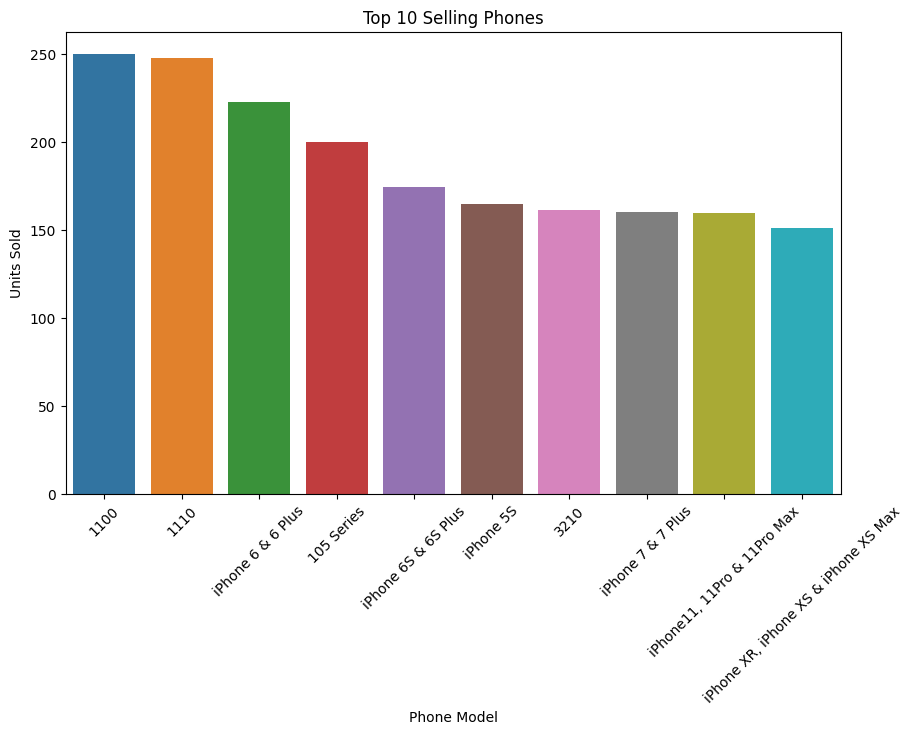

In [133]:
df_sorted_sold = df.sort_values(by='units_sold', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y='units_sold', x='model', data=df_sorted_sold)
plt.title('Top 10 Selling Phones')
plt.xlabel('Phone Model')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

In [148]:
df.groupby('manufacturer')['form_factor'].value_counts()

manufacturer              form_factor 
Apple                     Touchscreen     16
Google                    Touchscreen      1
HTC                       Touchscreen      1
Huawei                    Touchscreen      6
LG                        Touchscreen      3
                          Bar              2
                          Slider           2
LeTV                      Touchscreen      1
Motorola                  Bar              2
                          Flip phone       2
                          Touchscreen      1
Nokia                     Bar             18
                          Slider           3
                          Touchscreen      2
                          Flip phone       1
                          Keyboard bar     1
                          Taco             1
Oppo                      Touchscreen      2
Palm                      Keyboard bar     1
Research in Motion (RIM)  Bar              1
Samsung                   Touchscreen     40
                

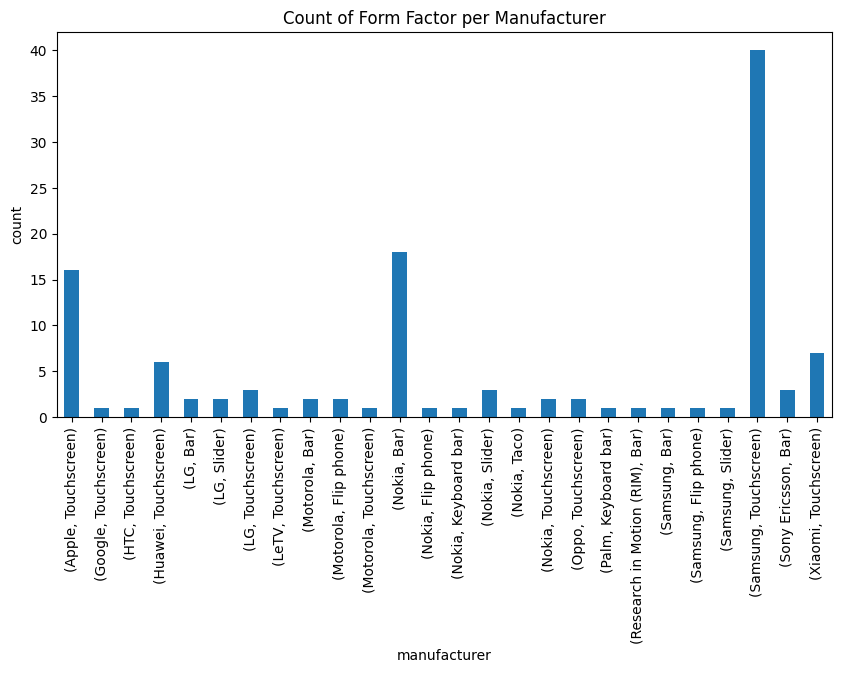

In [150]:
df_man_form = df.groupby(['manufacturer', 'form_factor']).size().plot(kind='bar', figsize=(10,5))
plt.xlabel('manufacturer')
plt.ylabel('count')
plt.title('Count of Form Factor per Manufacturer')
mdf.legend().remove()
plt.show()